# **Import libraries**

In [1]:
# ===== Packages =====
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import bootstrap
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm
from prettytable import PrettyTable

# ===== User Defined Packages =====
import titanic_helpers as th

%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 12

sns.set_theme(style="darkgrid")


# **EDA - Exploratory Data Analysis**
## In this section:
* Loading the data and sneak peeking it
* Check what data types exist in the dataset
* Get some statistics estimators from the data
* Check for missing values
* Plot some distributions
* Check for correlation between the features and also between the features and the target

In [2]:
df = pd.read_csv('Data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## We can see there are 891 records and 12 field: 11 predictors and 1 target (Survived)
## For convience we'll move the Survived field to the right hand of the table:

In [3]:
col_list = list(df.columns)
col_list[1], col_list[-1] = col_list[-1], col_list[1]
df = df.reindex(columns=col_list)

In [4]:
df.head()

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,1,S,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,S,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,S,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


## Some overview on the different features (just the not obvious ones):
* Embarked - Port of Embarktion (C = Cherbourg, Q = Queenstown, S = Southampton)
* Pclass - Ticket Class (1st classs, 2nd class...)
* SobSp - Number of siblings / spouses aboard the Titanic
* Parch - Number of parents / children aboard the Titanic
* Ticket - Ticket number
* Fare - The price of the ticket
* Cabin - Cabin number


## Get some info about the data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Embarked     889 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Use value counts on each feature to understand it more:

In [6]:
th.value_counts_all(df)

----------------------------------------PassengerId---------------------------------------- - 

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

----------------------------------------Embarked---------------------------------------- - 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

----------------------------------------Pclass---------------------------------------- - 

3    491
1    216
2    184
Name: Pclass, dtype: int64

----------------------------------------Name---------------------------------------- - 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnso

## Some inresting insights from value_counts (and also from df.info()):
* PassengerID gives us no information probably will be dropped.
* Embarked and Pclass are categorial variables with cardinality of 3.
* Name as it is gives us no useful information but it might be interesting to use the status (Miss, Mr) of the passengers as a new feature.
* Sex is a categorial variable with cardinality of 2.
* Age is a continuous variable with 177 null values out of 891 records.
* SibSp and Parch are categorial variables with cardinality of 7.
* For now it seems Ticket gives us no useful information (needs to be checked more thoroughly).
* Fare is a continuous variable.
* Cabin has 684 missing values and also has many different bins (and I'm sure that there are many more unkowns bins to us), so might be dropped.
* Survived is a categorial variable with cardinality of 2.



## **Plot features and target distributions:**

### Plot Pr(Surveived) and countplot of survived

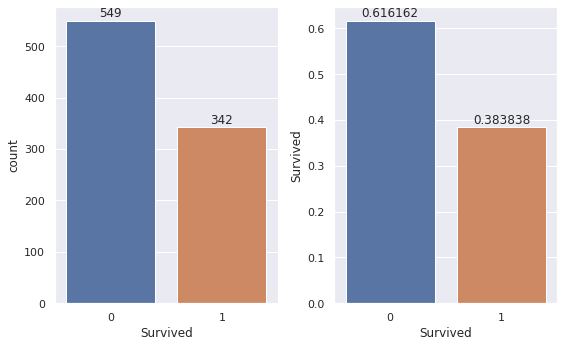

In [7]:
#titanic = sns.load_dataset("titanic")
fig = plt.figure(figsize=(8.,5.))
ax = fig.add_subplot(1,2,1)
ax = sns.countplot(x="Survived", data=df)
ax.bar_label(ax.containers[0], padding=1)

ax = fig.add_subplot(1,2,2)
ax = sns.barplot(x="Survived", y='Survived',data=df, estimator=lambda x: len(x) / len(df))
ax.bar_label(ax.containers[0], padding=1)

fig.tight_layout()

### We can see that the data is pretty balanced

### **Plot the categorial features: (Embarked, Pclass, Sex, SibSp, Parch)**
* Pr(feature) for detecting rare labels and biased features
* Barplot for the ditribution Pr(Survived|Feature)

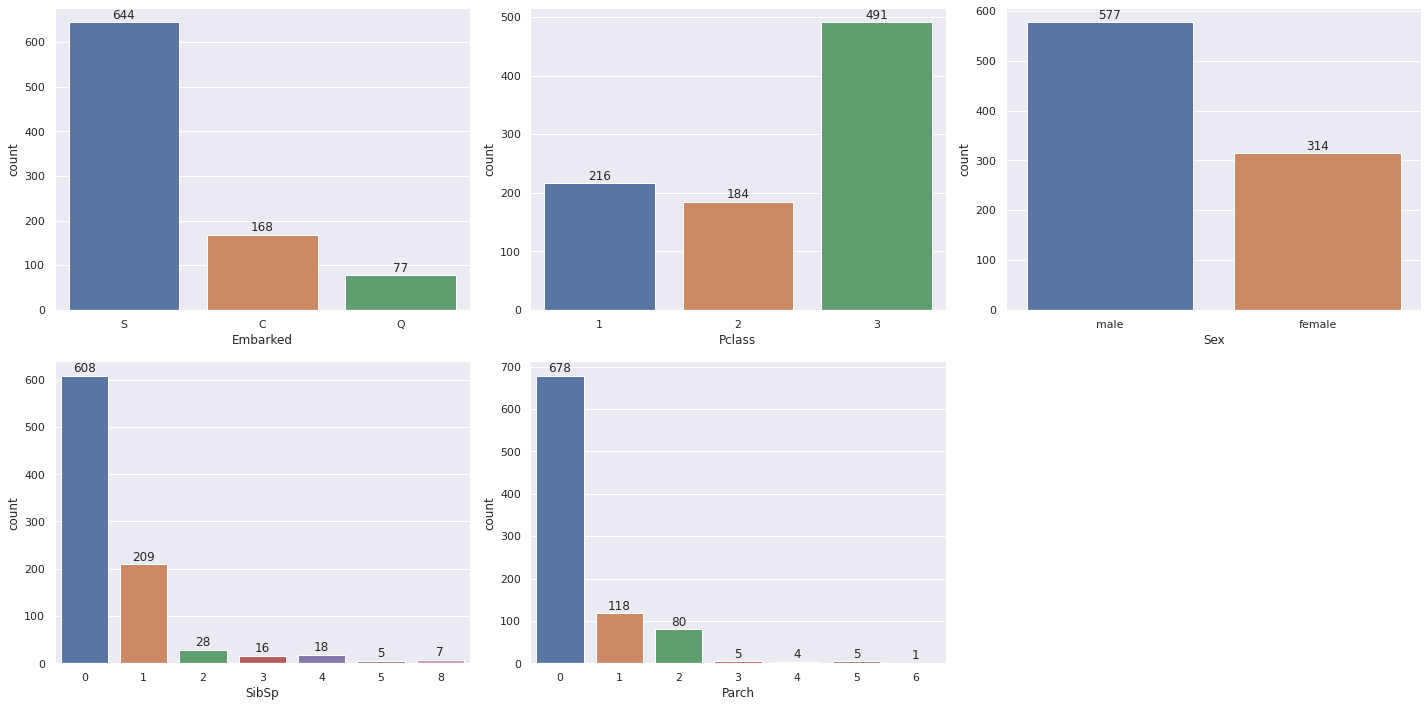

In [8]:
cols_to_plot = ['Embarked', 'Pclass', 'Sex', 'SibSp', 'Parch']
fig = plt.figure(figsize=(20.,10.))
for i, col in enumerate(cols_to_plot):
    ax = fig.add_subplot(2,3,i+1)
    ax = sns.countplot(x=col,data=df)
    ax.bar_label(ax.containers[0], padding=1)
    
    
fig.tight_layout()

## Pr(survived|feature):

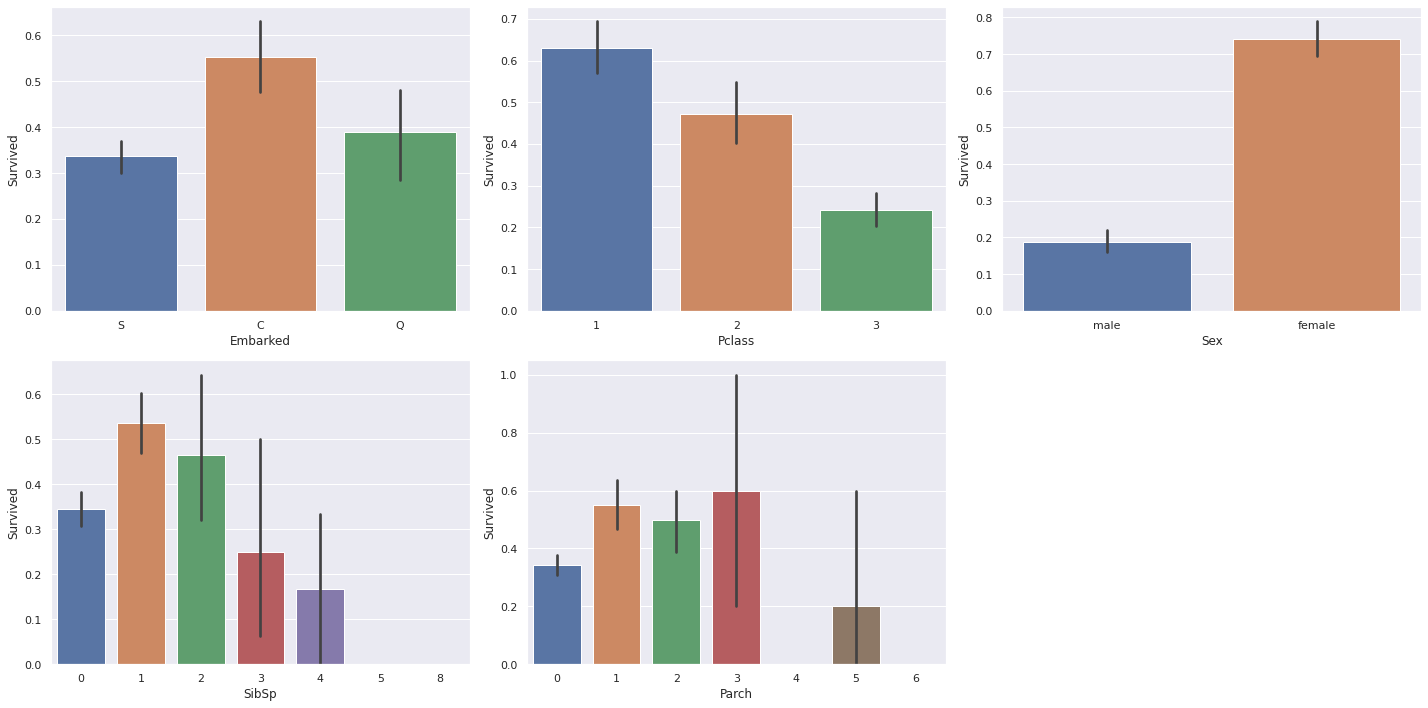

In [9]:
cols_to_plot = ['Embarked', 'Pclass', 'Sex', 'SibSp', 'Parch']
fig = plt.figure(figsize=(20.,10.))
for i, col in enumerate(cols_to_plot):
    ax = fig.add_subplot(2,3,i+1)
    ax = sns.barplot(x=col, y='Survived',data=df)
    
    
fig.tight_layout()


## Some interesting insights:
* people who embarked from Cherbourg are more likely to survive then people who embarked from Queenstown and Southampton
* the higher the pclass the higher the survival rate
* female survival rate was higher than male (I guess the men let the women to escape first) 
* about Sibsp and Parch: it seems that if you didnt have family at all in the boat or had too many family members then you are likely to not survive. (no family = no help, too many family members = too many people to help to)

## From the distributions it seems that all those features are very informative and that they should contribute to the classification

## **Plot the continues variables distributions:**
* NOTE: the age column is preimputed. after imputation we will plot the distribution again and compare to this one to make sure we did not change the distribution.

+---------+-------+---------------------------------------------------------------------+--------+-----------------------------------------------+
| Feature |  Mean |                            Mean CI (95%)                            | Median |                Median CI (95%)                |
+---------+-------+---------------------------------------------------------------------+--------+-----------------------------------------------+
|   Age   | 29.70 | ConfidenceInterval(low=28.636556722689065, high=30.748533613445375) | 28.00  |    ConfidenceInterval(low=27.0, high=29.0)    |
|   Fare  | 32.20 |  ConfidenceInterval(low=28.88866331088665, high=35.30481993265993)  | 14.45  | ConfidenceInterval(low=13.3584, high=15.9084) |
+---------+-------+---------------------------------------------------------------------+--------+-----------------------------------------------+


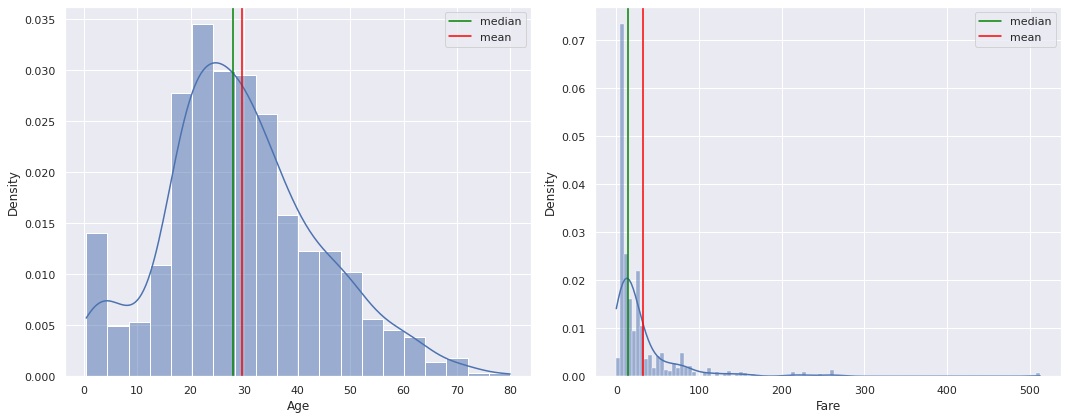

In [10]:
# Plot the age distribution
fig,ax = plt.subplots(1,2,figsize=(15, 6))
sns.histplot(data=df, x='Age', kde=True, stat='density', ax=ax[0])
age_mean = df['Age'].mean()
age_median = df['Age'].median()
ax[0].axvline(x=age_median, color='green', label='median')
ax[0].axvline(x=age_mean, color='red', label='mean')
ax[0].legend()

sns.histplot(data=df, x='Fare', kde=True, stat='density', ax=ax[1])
fare_mean = df['Fare'].mean()
fare_median = df['Fare'].median()
ax[1].axvline(x=fare_median, color='green', label='median')
ax[1].axvline(x=fare_mean, color='red', label='mean')
ax[1].legend()

fig.tight_layout()

# Print the mean, median, and CIs (using bootstrap) of each feature:
age_data = df[~df['Age'].isnull()]['Age'].values
fare_data = df['Fare'].values

ci_mean_age = bootstrap((age_data,), np.mean, confidence_level=0.95, method='basic')
ci_median_age = bootstrap((age_data,), np.median, confidence_level=0.95, method='basic')

ci_mean_fare = bootstrap((fare_data,), np.mean, confidence_level=0.95, method='basic')
ci_median_fare = bootstrap((fare_data,), np.median, confidence_level=0.95, method='basic')

statistics_table = PrettyTable(float_format='.2', field_names = ['Feature', 'Mean', 'Mean CI (95%)', 'Median', 'Median CI (95%)'])
statistics_table.add_row(['Age', age_mean, ci_mean_age.confidence_interval,age_median, ci_median_age.confidence_interval])
statistics_table.add_row(['Fare', fare_mean, ci_mean_fare.confidence_interval,fare_median, ci_median_fare.confidence_interval])
print(statistics_table)

## insights:
## Age:
* most of the passengers are around the age of 30
* the distribution seems to be unskewed (the median and mean are almost the same)

## Fare:
* the fare distribution seemes to be right skewed, we will have to deal with it later so it wont harm our models performance (especially the linear models) - maybe transform the data

## Plot Pr(Survived|Age) and Pr(not Survived|Age):

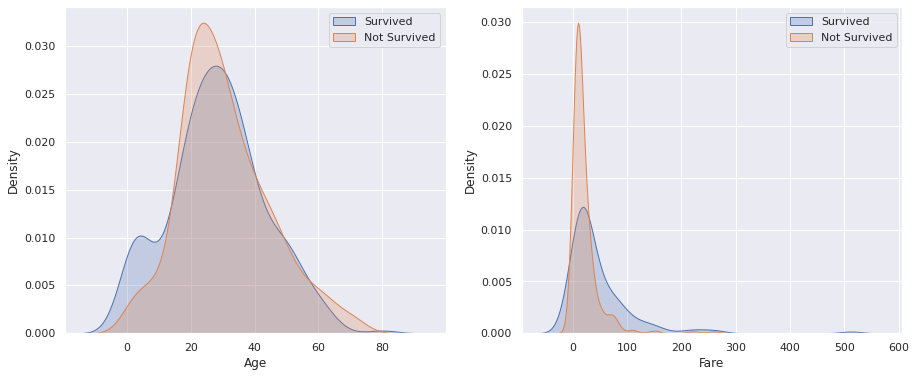

In [11]:
survived = df[df['Survived']==1]
not_survived = df[df['Survived']==0]

fig,ax = plt.subplots(1,2,figsize=(15, 6))
sns.kdeplot(data=survived, x='Age', fill=True,ax=ax[0], label='Survived')
sns.kdeplot(data=not_survived, x='Age', fill=True,ax=ax[0], label='Not Survived')
ax[0].legend()

sns.kdeplot(data=survived, x='Fare', fill=True, ax=ax[1], label='Survived')
sns.kdeplot(data=not_survived, x='Fare', fill=True, ax=ax[1], label='Not Survived')
ax[1].legend()


## **Insights**:
## Age:
* the young people (about 16 - 30) were less likely to survive, probably they let the children and the elderly escape first.
* also the old people (about 60 - 80) were less likely to survive

## Fare:
* the passengers who paid more were more likely to survive. 
It's correlated with that the people from the 1st class are more likely to survive. (maybe the fare feature does not give us mote information, we will check this when we will check the correlation between the different features)

## We can also see that both graphs have a clear splitting point - Age: about 16, Fare: about 50 - so these 2 variables might have high importance in Decision Trees based algorithms.

## **Correlation between features (also between features and target):** high correlated features are no good for linear models since the models will not be able to infer the feature importance. for example, if we have the model: Y = w1 * X1 + w2 * X2 and X1 and X2 are correlated then increase in X1 will cause an increase in X2, so we would no be able to see each feature's influence on Y.

<AxesSubplot:>

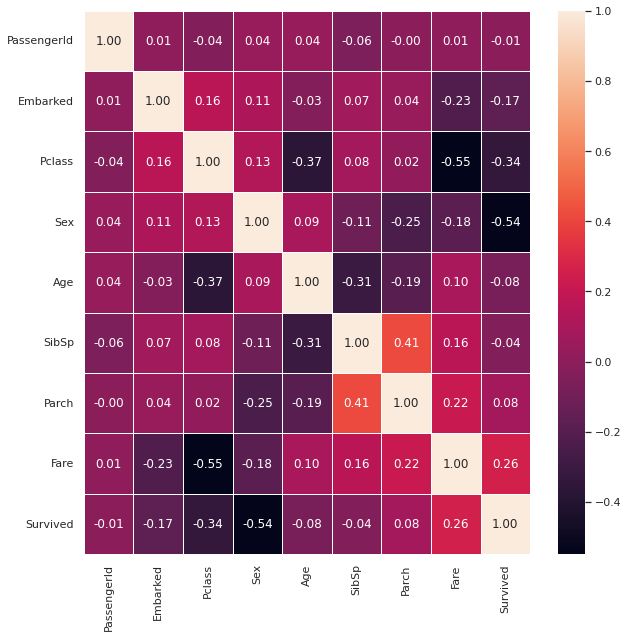

In [12]:
# First we will label the sex and embarked categories (pd.corr ignores not numeric categorial variables)
corr_df = df.copy(deep=True)
corr_df['Sex'] = corr_df['Sex'].map({'male':1, 'female':0})
corr_df['Embarked'] = corr_df['Embarked'].map({'C':0, 'Q':1, 'S':2})



fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.heatmap(corr_df.corr(), annot=True, linewidths=0.5, fmt='.2f', ax=ax)


## Sort features according to correlation: (take top 10)

In [13]:
corr = corr_df.corr()
# Take only the down traingle without the diagonal (correlation mactrix is symetric) 
# and take absolute value (we dont care about the direction of the correlation, only magnitude)
corr.loc[:,:] = np.abs(np.tril(corr.values, k=-1)) 
corr.unstack().sort_values(ascending=False)[:10]

Pclass    Fare        0.549500
Sex       Survived    0.543351
SibSp     Parch       0.414838
Pclass    Age         0.369226
          Survived    0.338481
Age       SibSp       0.308247
Fare      Survived    0.257307
Sex       Parch       0.245489
Embarked  Fare        0.226311
Parch     Fare        0.216225
dtype: float64

## insights:
* there is no multicolinearity problem in the data (no correlation higher than 0.7)
* we can use the high correlation between Pclass and Fare for imputing the missing data in Fare


# **Feature Engineering**
## In this section we'll do:
* data imputation
* deteting outliers
* drop features
* create new features (like from the titles of the names)
* encoding categorial variables
* Feature scaling

## NOTE: we won't use binnig since it can cause information loss. it's recommended to use binnig when the categories are obvious (for example: blood pressure - the values for high, medium, and low blood pressure are known)

## **Data Imputation**
## There are 3 cases of missing data:
1. Missing Completly At Random (MCAR): the missing data has nothing to do with the sample taken (example: the person who registered the samples forgot to write the age of the tested person)  
2. Missing At Random (MAR): the missingness can be explained by other variables but not by the variable itself. It's not a testable assumption, but there are cases where it is reasonable vs. not.
3. Missing Not At Random (MNAR): the missing value is dependent on the value of the missing value itself - Pr(y is missing|the value of y). in this case the value of y need to be picked carefully so y will not be heavily biased. Example: Obese people are likely not to disclose their weight.

NOTES:
1. in this project we'll assume the data is MCAR or MAR
2. we'll check for missing values in train and test sets. the test will be imputed accrding to the method used in the training set to avoid overfitting.




## First we'll check for missing values in the training set and test set:

In [14]:
df_test = pd.read_csv('Data/test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [15]:
missing_values_table = PrettyTable(field_names = ['Feature', 'NAs in train', 'NAs in test'])
for feature in df_test.columns:
    missing_values_table.add_row([feature, len(df[df[feature].isnull()]), len(df_test[df_test[feature].isnull()])])
    
print(missing_values_table)

+-------------+--------------+-------------+
|   Feature   | NAs in train | NAs in test |
+-------------+--------------+-------------+
| PassengerId |      0       |      0      |
|    Pclass   |      0       |      0      |
|     Name    |      0       |      0      |
|     Sex     |      0       |      0      |
|     Age     |     177      |      86     |
|    SibSp    |      0       |      0      |
|    Parch    |      0       |      0      |
|    Ticket   |      0       |      0      |
|     Fare    |      0       |      1      |
|    Cabin    |     687      |     327     |
|   Embarked  |      2       |      0      |
+-------------+--------------+-------------+


## As we can see there are 4 features with missing values: Age, Fare, Cabin, Embarked


## **Fare Imputation**: 

## there is only 1 missing value (only at the test set) so the method we'll use wont impact much the distribution. of course we dont want to impute it with a value that will cause this sample to be an outlier so we'll just use the median for imputing. 
## There is also an high correlation between Fare and Pclass (-0.55: the higher the fare the lower the class number), so we can use it: we''ll take the median of the fare of the subgroup of the passengers with the same class as the sample with the missing value.

## Note: we're using median instead of mean because the median is more imune to ouliers than mean.

In [16]:
# Get the the sample with the missing value:
missing_value_sample = df_test[df_test['Fare'].isnull()]
# Get the Pclass:
Pclass = missing_value_sample['Pclass']
# Calculate the median of the subgroup and then impute the missing data with it:
median = df[df['Pclass']==int(Pclass)]['Fare'].median()
df_test.loc[df_test['Fare'].isnull().values, 'Fare'] = median

In [17]:
df_test.loc[df_test['Fare'].isnull().values,'Fare']

Series([], Name: Fare, dtype: float64)

In [18]:
df_test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

## **Embarked imputation**: 

## there are only 2 missing values, so as we did with fare, we'll just use some statistic estimator for imputing. Embarked is a categorial variable so we'll just might use the mode - the most frequent value.

## From the correlation matrix it seems there is some correlation between Embarked and Pclass. Lets check it on a graph: 


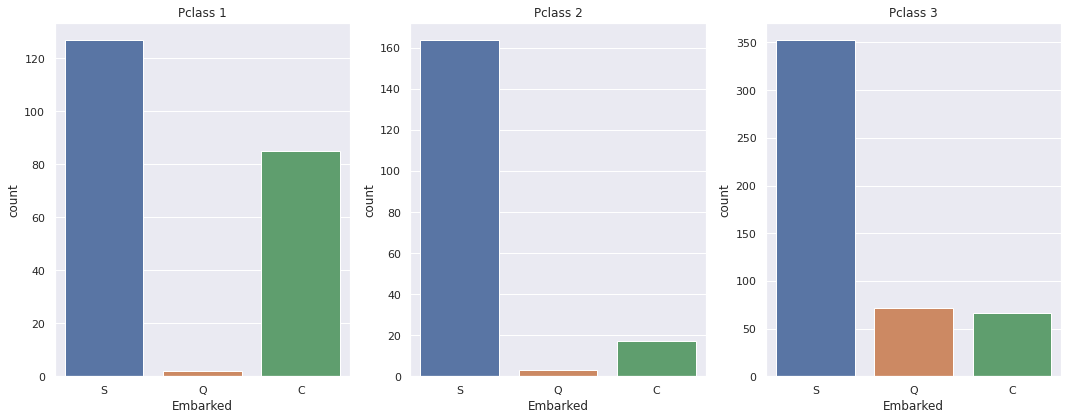

In [19]:
class_groups = df.groupby(by=['Pclass'])

fig,axes = plt.subplots(1,3, figsize=(15, 6))
for i, ax in enumerate(axes):
    sns.countplot(x='Embarked', data = class_groups.get_group(i+1), order=['S', 'Q', 'C'],ax=ax)
    ax.set_title(f'Pclass {i+1}')

fig.tight_layout()

In [20]:
# now lets take a look at the samples with the missing values:
df[df['Embarked'].isnull()]


,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
61,62,NaN,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,1
829,830,NaN,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,1


## They are both from Pclass so it most likely that they embarked from S or from C. we'll try to determine from where according to the fare which equals to 80 for both samples (there's also high correlation between embarked and fair):

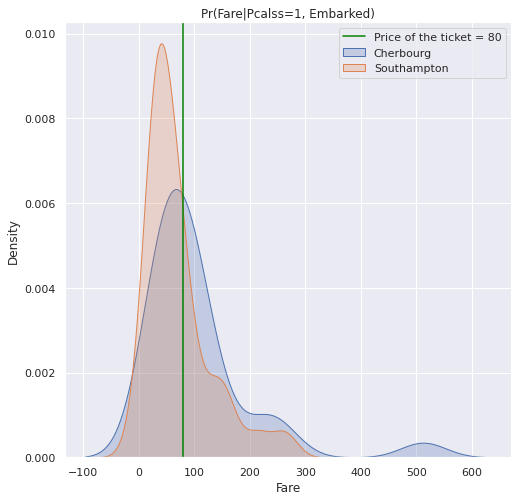

In [21]:

embarked_groups = class_groups.get_group(1).groupby(['Embarked'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
sns.kdeplot(data=embarked_groups.get_group('C'), x='Fare', fill=True, ax=ax, label='Cherbourg')
sns.kdeplot(data=embarked_groups.get_group('S'), x='Fare', fill=True, ax=ax, label='Southampton' )
ax.axvline(x=80.0, color='green', label='Price of the ticket = 80')
ax.set_title('Pr(Fare|Pcalss=1, Embarked)')
ax.legend()

## As we can see we cant determine from where the passengers embarked (Southampton or Cherbourg) because at the value of 80 the distributions intersect. So we'll just impute one of them as S and the other as C:

In [22]:
df.loc[61, 'Embarked'] = 'S'
df.loc[829, 'Embarked'] = 'C'

In [23]:
df[df['Embarked'].isnull()]

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived


## **Cabin Imputation**:

## Seems there are too many missing values in Cabin. We'll check the precentage of the missing values and if it's too high we'll just remove the feature.

In [24]:
num_of_missing_vals = len(df[df['Cabin'].isnull()])
df_len = len(df)
percentage = (num_of_missing_vals/df_len) * 100

print(f"The precentage of the missing values in Cabin:{percentage:.3f}")

The precentage of the missing values in Cabin:77.104


## 77% seems to be very high. for now we'll drop the feature, but we will get back to it later and try to extract something usefull from the feature. (maybe Knn imputer will do the job?)

In [25]:
df.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)
df

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Survived
0,1,S,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1
2,3,S,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1
4,5,S,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0
887,888,S,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0
889,890,C,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1


## **Age Imputation**:

## The training set has 177 missing values and the test set has 86 missing values. We can use features that are correlated to age to try and predict the imputation (Parch and Pclass are high correlated to age), but in some way it's like binning because it will make us use median of small number of subgroups. 
## This will cause loss of information and overfitting and we would like to avoid it.
## We'll use a more sophisticated method: **Knn imputer** which imputes missing values acording to the mean value of the n_neighbours.

In [26]:
df_for_plot = df.copy(deep=True)
df_impute = df.copy(deep=True)

# remove Ticket feature (probably will be removed in feature selection section) and name column (for now it's not usefull) and passengerID
df_impute.drop(['Ticket', 'Name', 'PassengerId', 'Survived'], axis=1, inplace=True)

# Knn cant handle text data values so we'll have to one-hot-encode the Embarked and Sex columns
cat_variables = df_impute[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True) # drop redundant column to avoid the Dummy variable trap

# replace the original columns with the dummy ones
df_impute.drop(['Sex', 'Embarked'], axis=1, inplace=True)
df_impute = pd.concat([df_impute, cat_dummies], axis=1)

# Knn algorithm is based on Eucledian distance so it requiers us to normalize our data:
scaler = MinMaxScaler()
df_impute = pd.DataFrame(scaler.fit_transform(df_impute), columns=df_impute.columns)

# Impute:
imputer = KNNImputer(n_neighbors=5)
trained_imputer = imputer.fit(df_impute)
df_impute = pd.DataFrame(trained_imputer.transform(df_impute), columns=df_impute.columns)

# return to not normalized values:
df_impute = pd.DataFrame(scaler.inverse_transform(df_impute), columns=df_impute.columns)

# copy the Age column to the original dataframe:
df['Age'] = df_impute['Age']
df.isnull().sum()

df_impute.isnull().sum()



Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Now that we are done with the Age imputing we would like to check if we didnt harmed the distribution on the Age feature:

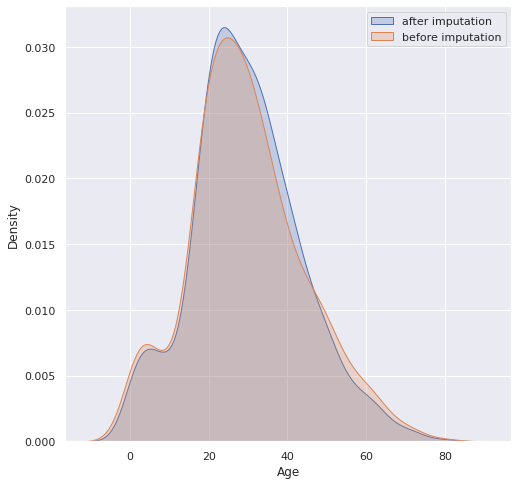

In [27]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.kdeplot(x='Age', data=df, fill=True, ax=ax, linewidth=1, label='after imputation')
sns.kdeplot(x='Age', data=df_for_plot, fill=True, ax=ax, linewidth=1, linestyle='-',label='before imputation')
ax.legend()


## As we can see the distibution was pretty much kept 

## Now we'll use the trained Imputer on the test data

In [28]:
df_impute




,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,13.0000,1.0,0.0,1.0
887,1.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0
888,3.0,20.0,1.0,2.0,23.4500,0.0,0.0,1.0
889,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0


In [29]:
df_for_plot = df_test.copy(deep=True)
df_impute = df_test.copy(deep=True)

# remove Ticket feature (probably will be removed in feature selection section) and name column (for now it's not usefull) and passengerID
df_impute.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# Knn cant handle text data values so we'll have to one-hot-encode the Embarked and Sex columns
cat_variables = df_impute[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True) # drop redundant column to avoid the Dummy variable trap

# replace the original columns with the dummy ones
df_impute.drop(['Sex', 'Embarked'], axis=1, inplace=True)
df_impute = pd.concat([df_impute, cat_dummies], axis=1)

# Knn algorithm is based on Eucledian distance so it requiers us to normalize our data:
scaler = MinMaxScaler()
df_impute = pd.DataFrame(scaler.fit_transform(df_impute), columns=df_impute.columns)

# Impute:
df_impute = pd.DataFrame(trained_imputer.transform(df_impute), columns=df_impute.columns)

# return to not normalized values:
df_impute = pd.DataFrame(scaler.inverse_transform(df_impute), columns=df_impute.columns)

# copy the Age column to the original dataframe:
df_test['Age'] = df_impute['Age']
df_test.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Compare distributions

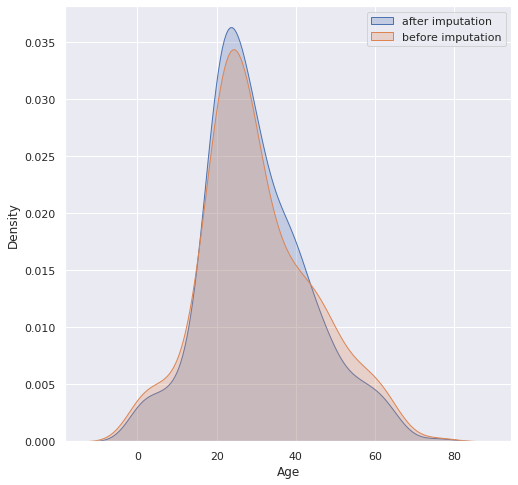

In [30]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.kdeplot(x='Age', data=df_test, fill=True, ax=ax, linewidth=1, label='after imputation')
sns.kdeplot(x='Age', data=df_for_plot, fill=True, ax=ax, linewidth=1, linestyle='-',label='before imputation')
ax.legend()

## The distribution was pretty much kept

## **All data is imputed!**

## **Outliers:**